1.In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [27]:
from sklearn.datasets import load_iris
data = load_iris()
x = data['data']
y = data['target']

In [29]:
## PCA
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=3)
pca_data = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_data,columns=['col1','col2','col3'])

In [30]:
target = pd.DataFrame(y,columns=['class'])

In [31]:
## concat 
final_df = pd.concat([pca_df,target],axis=1)

In [33]:
## replacing the target class with names
final_df['class'].replace({0:"setosa",1:'versicolor',2:'virginica'},inplace = True)
final_df

,col1,col2,col3,class
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


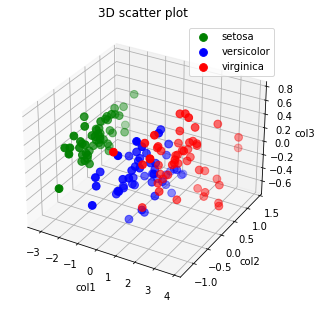

In [38]:
labels=['setosa','versicolor','virginica']
colors = ['g','b','r']
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection="3d")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
ax.set_title('3D scatter plot')
for label,color in zip(labels,colors):
    data = final_df['class'] == label
    sc = ax.scatter(final_df.loc[data,'col1'],
                    final_df.loc[data,'col2'],
                    final_df.loc[data,'col3'],
                    c=color,s=60)
plt.legend(labels)
ax.grid()
plt.show()